# Multivariate time series classification with sktime

In this notebook, we will use sktime for multivariate time series classification.

For the simpler univariate time series classification setting, take a look at this [notebook](https://github.com/alan-turing-institute/sktime/blob/main/examples/02_classification_univariate.ipynb).

### Preliminaries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.shapelet_based import MrSEQLClassifier
#https://github.com/sktime/sktime/blob/v0.8.1/sktime/classification/shapelet_based/mrseql/mrseql.pyx
from sktime.datasets._data_io import load_from_tsfile_to_dataframe

import os
from matplotlib import pyplot as plt

## Load data

In [2]:
DATA_PATH = os.path.join("./../data/Univariate_ts/")

In [3]:
dataset_name = "FaceAll"

X_train, y_train = load_from_tsfile_to_dataframe(
    os.path.join(DATA_PATH, dataset_name, f"{dataset_name}_TRAIN.ts")
)
X_test, y_test = load_from_tsfile_to_dataframe(
    os.path.join(DATA_PATH, dataset_name, f"{dataset_name}_TEST.ts")
)

In [8]:
X_train.shape

(560, 1)

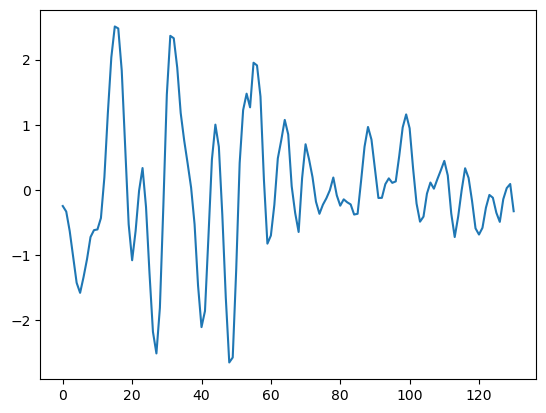

In [4]:
## An example of Time Series from this dataset

plt.plot(X_train["dim_0"].iloc[0])

In [5]:
# multi-class target variable
np.unique(y_train)

array(['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7',
       '8', '9'], dtype='<U2')

## Create the model

### Params of MrSEQLClassifier
```
seql_mode       : str, either 'clf' or 'fs'. In the 'clf' mode, Mr-SEQL is an ensemble of SEQL models while in the 'fs' mode Mr-SEQL trains a logistic regression model with features extracted by SEQL from symbolic representations of time series.

symrep          : list or tuple, should contains only 'sax' or 'sfa' or both. The symbolic representations to be used to transform the input time series.
```

In [6]:
clf = MrSEQLClassifier(seql_mode="fs", symrep=('sax', 'sfa'))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7958579881656804

In [7]:
clf.config

[{'method': 'sax', 'window': 16, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 27, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 38, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 49, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 60, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 71, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 82, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 93, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 104, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 115, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 126, 'word': 16, 'alphabet': 4},
 {'method': 'sfa', 'window': 16, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 27, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 38, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 49, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 60, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window

In [9]:
clf = MrSEQLClassifier(seql_mode="clf", symrep=('sax', 'sfa'))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7923076923076923

In [10]:
clf.config

[{'method': 'sax', 'window': 16, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 27, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 38, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 49, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 60, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 71, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 82, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 93, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 104, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 115, 'word': 16, 'alphabet': 4},
 {'method': 'sax', 'window': 126, 'word': 16, 'alphabet': 4},
 {'method': 'sfa', 'window': 16, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 27, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 38, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 49, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window': 60, 'word': 8, 'alphabet': 4},
 {'method': 'sfa', 'window